In [1]:
import nltk,re,pprint
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import pprint,time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import seaborn as sns

In [2]:
wsj = list(nltk.corpus.treebank.tagged_sents())

In [3]:
print(wsj[:40])

[[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')], [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')], [('Rudolph', 'NNP'), ('Agnew', 'NNP'), (',', ','), ('55', 'CD'), ('years', 'NNS'), ('old', 'JJ'), ('and', 'CC'), ('former', 'JJ'), ('chairman', 'NN'), ('of', 'IN'), ('Consolidated', 'NNP'), ('Gold', 'NNP'), ('Fields', 'NNP'), ('PLC', 'NNP'), (',', ','), ('was', 'VBD'), ('named', 'VBN'), ('*-1', '-NONE-'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('of', 'IN'), ('this', 'DT'), ('British', 'JJ'), ('industrial', 'JJ'), ('conglomerate', 'NN'), ('.', '.')], [('A', 'DT'), ('f

In [4]:
random.seed(1234)
train_set, test_set = train_test_split(wsj,test_size=0.3)
print(len(train_set))
print(len(test_set))
print(train_set[:40])

2739
1175
[[('Lewis', 'NNP'), ('C.', 'NNP'), ('Veraldi', 'NNP'), (',', ','), ('the', 'DT'), ('father', 'NN'), ('of', 'IN'), ('the', 'DT'), ('team', 'NN'), ('that', 'WDT'), ('*T*-1', '-NONE-'), ('created', 'VBD'), ('the', 'DT'), ('highly', 'RB'), ('successful', 'JJ'), ('Ford', 'NNP'), ('Taurus', 'NNP'), ('and', 'CC'), ('Mercury', 'NNP'), ('Sable', 'NNP'), ('cars', 'NNS'), (',', ','), ('retired', 'VBD'), ('early', 'RB'), ('after', 'IN'), ('*-2', '-NONE-'), ('experiencing', 'VBG'), ('recent', 'JJ'), ('heart', 'NN'), ('problems', 'NNS'), ('.', '.')], [('Put', 'VB'), ('option', 'NN'), ('March', 'NNP'), ('31', 'CD'), (',', ','), ('1992', 'CD'), (',', ','), ('at', 'IN'), ('a', 'DT'), ('fixed', 'VBN'), ('107', 'CD'), ('7\\/8', 'CD'), ('*', '-NONE-'), ('to', 'TO'), ('yield', 'VB'), ('3.43', 'CD'), ('%', 'NN'), ('.', '.')], [('``', '``'), ('I', 'PRP'), ('was', 'VBD'), ("n't", 'RB'), ('ever', 'RB'), ('actively', 'RB'), ('engaged', 'VBN'), ('*-1', '-NONE-'), ('in', 'IN'), ('any', 'DT'), ('securiti

In [5]:
train_tagged_words = [tup for sent in train_set for tup in sent]
len(train_tagged_words)

70216

In [6]:
tokens = [pair[0] for pair in train_tagged_words]
tokens[:10]

['Lewis', 'C.', 'Veraldi', ',', 'the', 'father', 'of', 'the', 'team', 'that']

In [7]:
V = set(tokens)
print(len(V))

10174


In [8]:
T = set([pair[1] for pair in train_tagged_words])
len(T)

46

In [9]:
print(T)

{'VBD', 'CC', 'NN', 'WDT', 'RBS', '$', 'JJ', 'FW', ',', '-LRB-', 'WP', 'POS', 'JJR', 'PRP', 'TO', 'PDT', 'WRB', 'VBZ', 'VBG', 'DT', 'VBP', '-NONE-', 'IN', 'JJS', 'NNP', 'RP', "''", 'VBN', 'MD', 'UH', '.', 'EX', 'WP$', '#', 'LS', 'PRP$', '-RRB-', 'RB', 'CD', 'NNS', 'VB', 'RBR', '``', 'NNPS', ':', 'SYM'}


In [10]:
t = len(T)
v = len(V)
w_given_t = np.zeros((t,v))

In [11]:
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1] == tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list  if pair[0] == word ]
    count_w_given_tag = len(w_given_tag_list)
    return (count_w_given_tag, count_tag)

In [12]:
print("\n", "large")
print(word_given_tag('large', 'JJ'))
print(word_given_tag('large', 'VB'))
print(word_given_tag('large', 'NN'), '\n')


 large
(18, 4048)
(0, 1821)
(0, 9131) 



In [13]:
print("\n", "will")
print(word_given_tag('will', 'MD'))
print(word_given_tag('will', 'NN'))
print(word_given_tag('will', 'VB'), '\n')


 will
(209, 666)
(1, 9131)
(0, 1821) 



In [14]:
print("\n", "book")
print(word_given_tag('book', 'NN'))
print(word_given_tag('book', 'VB'))



 book
(3, 9131)
(1, 1821)


In [15]:
def t2_given_t1 (t2,t1, train_bag =  train_tagged_words):
    tags =[pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags  if t == t1])
    count_t2_t1 = 0
    for index in range(len(tags) - 1):
        if tags[index] == t1 and tags[index+1] == t2:
            count_t2_t1 +=1
            
    return (count_t2_t1, count_t1)
        

In [16]:
print(t2_given_t1(t2='NNP', t1='JJ'))
print(t2_given_t1(t2='NN', t1='JJ'))
print(t2_given_t1(t2='NN', t1='DT'))

(144, 4048)
(1802, 4048)
(2661, 5682)


In [17]:
tags_matrix = np.zeros((len(T), len(T)), dtype="float32")
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)):
        tags_matrix[i,j] = t2_given_t1(t2,t1)[0]/t2_given_t1(t2,t1)[1]
        

In [18]:
tags_matrix

array([[0.        , 0.0014218 , 0.02985782, ..., 0.        , 0.00236967,
        0.        ],
       [0.03524804, 0.        , 0.10900784, ..., 0.00195822, 0.00065274,
        0.        ],
       [0.04807797, 0.03712627, 0.1267112 , ..., 0.        , 0.0154419 ,
        0.        ],
       ...,
       [0.03278688, 0.06557377, 0.03278688, ..., 0.01092896, 0.03825137,
        0.        ],
       [0.02331002, 0.06060606, 0.03729604, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [19]:
tag_df = pd.DataFrame(tags_matrix, columns=list(T), index=list(T))

In [20]:
tag_df

,VBD,CC,NN,WDT,RBS,$,JJ,FW,",",-LRB-,...,-RRB-,RB,CD,NNS,VB,RBR,``,NNPS,:,SYM
VBD,0.000000,0.001422,0.029858,0.000000,0.000000,0.013744,0.043128,0.000000,0.008531,0.000000,...,0.000000,0.081991,0.049763,0.022749,0.001896,0.002370,0.004739,0.000000,0.002370,0.000000
CC,0.035248,0.000000,0.109008,0.000653,0.000000,0.022193,0.110966,0.000000,0.010444,0.000000,...,0.000000,0.047650,0.040470,0.069843,0.033943,0.002611,0.005222,0.001958,0.000653,0.000000
NN,0.048078,0.037126,0.126711,0.007776,0.000000,0.000219,0.007885,0.000000,0.107765,0.001314,...,0.001862,0.016537,0.005257,0.083014,0.001643,0.000657,0.002847,0.000000,0.015442,0.000000
WDT,0.006349,0.000000,0.009524,0.000000,0.000000,0.000000,0.012698,0.000000,0.000000,0.000000,...,0.000000,0.006349,0.006349,0.015873,0.000000,0.000000,0.006349,0.000000,0.003175,0.000000
RBS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.758621,0.000000,0.000000,0.000000,...,0.000000,0.172414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
$,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009823,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.990177,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JJ,0.000741,0.014575,0.445158,0.000000,0.000000,0.001235,0.066700,0.000000,0.030385,0.000494,...,0.000247,0.002470,0.020010,0.247283,0.000000,0.000494,0.002470,0.000741,0.003458,0.000000
FW,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
",",0.054206,0.079384,0.052725,0.035841,0.000889,0.011848,0.044431,0.000296,0.000000,0.000592,...,0.000000,0.055687,0.023104,0.025474,0.002962,0.000889,0.013033,0.000296,0.000000,0.000000
-LRB-,0.000000,0.024691,0.061728,0.000000,0.000000,0.148148,0.037037,0.000000,0.000000,0.000000,...,0.000000,0.012346,0.074074,0.024691,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


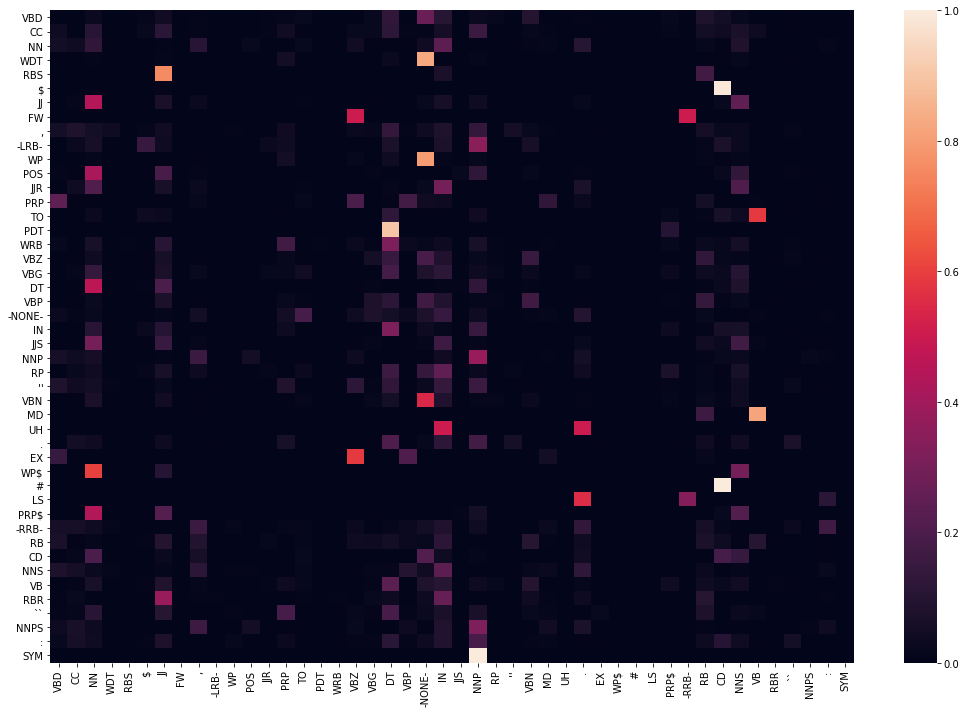

In [21]:
plt.figure(figsize=(18,12))
sns.heatmap(tag_df)
plt.show()

In [22]:
len(train_tagged_words)

70216

In [39]:
def Viterb(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        P = []
        for tag in T:
            if key == 0:
                trainsition_p = tag_df.loc['.', tag]
            else:
                trainsition_p = tag_df.loc[state[-1], tag]
                
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * trainsition_p
            P.append(state_probability)
            
        pmax = max(P)
        
        state_max = T[P.index(pmax)]
        state.append(state_max)
    return list(zip(words, state))
        

In [40]:
random.seed(1234)
rndom = [random.randint(1, len(test_set)) for x in range(5)]
test_run = [test_set[i] for i in rndom]
test_run_base =[tup for sent in test_run for tup in sent]
test_tagged_words = [tup[0] for sent in test_run for tup in sent]
test_run

[[('Among', 'IN'),
  ('professionals', 'NNS'),
  (',', ','),
  ('76', 'CD'),
  ('%', 'NN'),
  ('have', 'VBP'),
  ('a', 'DT'),
  ('favorable', 'JJ'),
  ('opinion', 'NN'),
  ('of', 'IN'),
  ('her', 'PRP$'),
  (',', ','),
  ('compared', 'VBN'),
  ('to', 'TO'),
  ('62', 'CD'),
  ('%', 'NN'),
  ('who', 'WP'),
  ('*T*-248', '-NONE-'),
  ('approve', 'VBP'),
  ('of', 'IN'),
  ('her', 'PRP$'),
  ('husband', 'NN'),
  ("'s", 'POS'),
  ('performance', 'NN'),
  ('.', '.')],
 [('Late', 'RB'),
  ('that', 'DT'),
  ('afternoon', 'NN'),
  ('the', 'DT'),
  ('S&P', 'NNP'),
  ('500', 'CD'),
  ('stock-index', 'JJ'),
  ('futures', 'NNS'),
  ('contract', 'NN'),
  ('fell', 'VBD'),
  ('a', 'DT'),
  ('total', 'NN'),
  ('of', 'IN'),
  ('30', 'CD'),
  ('index', 'NN'),
  ('points', 'NNS'),
  (',', ','),
  ('*-1', '-NONE-'),
  ('hitting', 'VBG'),
  ('a', 'DT'),
  ('Merc', 'NNP'),
  ('circuit', 'NN'),
  ('breaker', 'NN'),
  ('limit', 'NN'),
  ('that', 'WDT'),
  ('*T*-210', '-NONE-'),
  ('remained', 'VBD'),
  ('in', '

In [41]:
start = time.time()
tagged_seq =  Viterb(test_tagged_words)
end = time.time()
difference = end-start

In [42]:
print(difference)
print(tagged_seq)

39.54318141937256
[('Among', 'IN'), ('professionals', 'NNS'), (',', ','), ('76', 'VBD'), ('%', 'NN'), ('have', 'VBP'), ('a', 'DT'), ('favorable', 'JJ'), ('opinion', 'NN'), ('of', 'IN'), ('her', 'PRP$'), (',', 'VBD'), ('compared', 'VBN'), ('to', 'TO'), ('62', 'CD'), ('%', 'NN'), ('who', 'WP'), ('*T*-248', 'VBD'), ('approve', 'VB'), ('of', 'IN'), ('her', 'PRP$'), ('husband', 'NN'), ("'s", 'POS'), ('performance', 'NN'), ('.', '.'), ('Late', 'RB'), ('that', 'IN'), ('afternoon', 'NN'), ('the', 'DT'), ('S&P', 'NNP'), ('500', 'CD'), ('stock-index', 'NN'), ('futures', 'NNS'), ('contract', 'NN'), ('fell', 'VBD'), ('a', 'DT'), ('total', 'JJ'), ('of', 'IN'), ('30', 'CD'), ('index', 'NN'), ('points', 'NNS'), (',', ','), ('*-1', '-NONE-'), ('hitting', 'VBG'), ('a', 'DT'), ('Merc', 'NNP'), ('circuit', 'NN'), ('breaker', 'NN'), ('limit', 'NN'), ('that', 'IN'), ('*T*-210', 'VBD'), ('remained', 'VBD'), ('in', 'IN'), ('effect', 'NN'), ('for', 'IN'), ('the', 'DT'), ('rest', 'NN'), ('of', 'IN'), ('the', '

In [43]:
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j]

In [44]:
accuracy = len(check)/len(tagged_seq)

In [45]:
accuracy

0.8504672897196262

In [46]:
incorrect_tagged_case = [[test_run_base [i-1], j] for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0] != j[1]]

In [47]:
incorrect_tagged_case

[[(',', ','), (('76', 'VBD'), ('76', 'CD'))],
 [('her', 'PRP$'), ((',', 'VBD'), (',', ','))],
 [('who', 'WP'), (('*T*-248', 'VBD'), ('*T*-248', '-NONE-'))],
 [('*T*-248', '-NONE-'), (('approve', 'VB'), ('approve', 'VBP'))],
 [('Late', 'RB'), (('that', 'IN'), ('that', 'DT'))],
 [('500', 'CD'), (('stock-index', 'NN'), ('stock-index', 'JJ'))],
 [('a', 'DT'), (('total', 'JJ'), ('total', 'NN'))],
 [('limit', 'NN'), (('that', 'IN'), ('that', 'WDT'))],
 [('that', 'WDT'), (('*T*-210', 'VBD'), ('*T*-210', '-NONE-'))],
 [('.', '.'), (('Again', 'VBD'), ('Again', 'RB'))],
 [(',', ','), (('program-trading', 'JJ'), ('program-trading', 'NN'))],
 [('program-trading', 'NN'), (("'s", 'VBZ'), ("'s", 'POS'))],
 [("''", "''"), (('theme', 'VBD'), ('theme', 'NN'))],
 [('the', 'DT'), (('first', 'JJ'), ('first', 'RB'))],
 [('plan', 'NN'), (('offered', 'VBD'), ('offered', 'VBN'))],
 [('two-year', 'JJ'), (('cost-control', 'VBD'), ('cost-control', 'JJ'))]]